In [12]:
from simulation import *
from aesthetics import *
from models import *
from data import *

import glob
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)

In [15]:
df = pd.DataFrame()
hiv_dir = '../../md-data/hiv-protease/'
hiv_unbound_files = sorted(glob.glob(hiv_dir + '1hhp_apo/' + '*'))

for file in range(len(hiv_unbound_files)):
    name = os.path.splitext(os.path.basename(hiv_unbound_files[file]))[0]
    name = re.search('^[^_]*', name).group(0)
    this = simulation(data_source='hiv_md_data')
    this.name = name
    this.simulate()
    flux_with_catalysis = np.mean(this.flux_u + this.flux_b)
    flux_with_catalysis_std = np.std(this.flux_u + this.flux_b)

    this.catalytic_rate = 0
    this.simulate()
    flux_without_catalysis = np.mean(this.flux_u + this.flux_b)
    flux_without_catalysis_std = np.std(this.flux_u + this.flux_b)

    df = df.append(pd.DataFrame({'Flux with catalysis': flux_with_catalysis,
                            'Flux with catalysis Std': flux_with_catalysis_std,
                            'Flux without catalysis': flux_without_catalysis,
                            'Flux without catalysis Std': flux_without_catalysis_std,
                            'File': name,
                            'Ratio': flux_with_catalysis / flux_without_catalysis,
                            }, index=[0]), ignore_index=True)

In [16]:
df.sort_values(by='Flux with catalysis', ascending=False).head()

,File,Flux with catalysis,Flux with catalysis Std,Flux without catalysis,Flux without catalysis Std,Ratio
972,psiLYS55,0.186666,0.361379,-0.001027,0.450882,-181.800331
936,psiILE72,0.056917,0.086457,-0.009767,0.026705,-5.827287
994,psiPRO9,0.031443,0.035348,-0.015663,0.070421,-2.007437
876,psiGLN58,0.030265,0.042431,0.006284,0.036659,4.816132
991,psiPRO63,0.029256,0.054399,0.063074,0.131358,0.463832


## Write these to an attribute file that can be used by chimera

In [5]:
df['ResID'] = df['File'].str.extract('(\\d+$)')
filename = 'hiv-residues-by-flux'
attribute = 'flux'

file = str(filename) + '.dat'
f = open(file, 'w')
f.write('attribute: {}\n'.format(attribute))
f.write('match mode: any\n')
f.write('recipient: residues\n')
    # Loop over the residues
for i in range(1, max(df['ResID'].astype(int))):
    # For each residue, write the flux value that's the greatest...
    x = df[df['ResID'] == str(i)]['Flux with catalysis']
    value = max(abs(df[df['ResID'] == str(i)]['Flux with catalysis']))
    f.write('\t:{}\t{}\n'.format(i, value))
f.close()

/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [9]:
total_angles = len(df)
some_flux = len(df[ abs(df['Flux with catalysis'] > 0.1)])
print('{} / {}'.format(some_flux, total_angles))

1 / 1031


# Investigate psiLYS55

C_intrasurface = 	8.33e+10 second**-1
D = 			3.00e+12 degrees**2 second**-1
C_intersurface = 	1.00e+06 mol**-1 second**-1
Catalytic rate = 	300 second**-1
ATP concentration = 	0.002 M
Time step = 		1.00e-15 second
Intrasurface flux = 	0.39 +/- 0.65 cycles second**-1


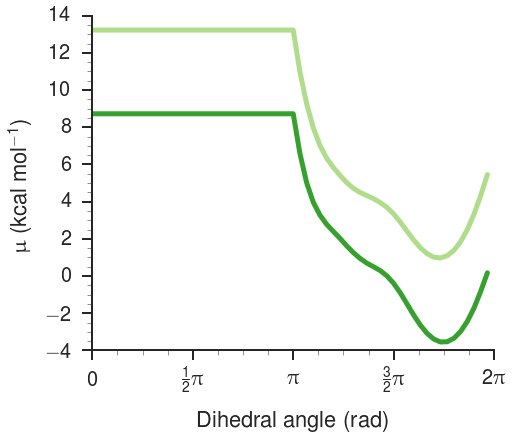

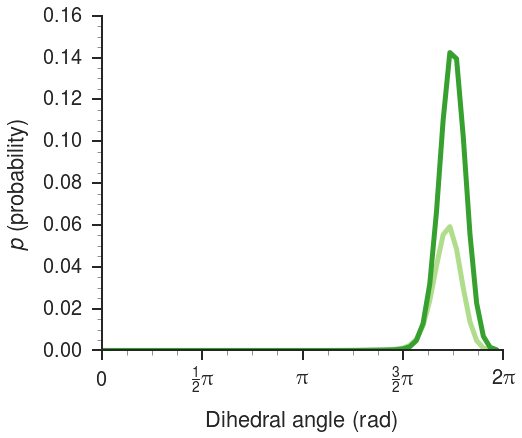

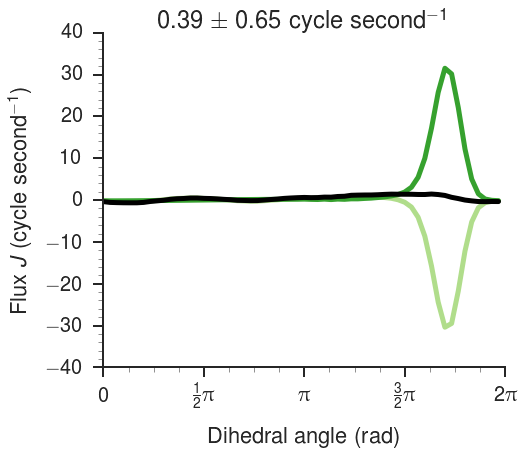

In [20]:
this = simulation(data_source='hiv_md_data')
this.name = 'psiLYS55'
# this.load = True
# this.load_slope = -2
this.catalytic_rate = 300
this.simulate(plot=True)
# this.plot_load()
#this.plot_load_extrapolation()
# this.plot_flux()

In [46]:
this.unbound_population

array([  2.90000000e-04,   3.40000000e-05,   2.00000000e-06,
         2.00000000e-06,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         6.00000000e-06,   2.00000000e-06,   2.80000000e-05,
         8.40000000e-05,   2.60000000e-04,   5.40000000e-04,
         1.23400000e-03,   2.08400000e-03,   3.46200000e-03,
         5.55000000e-03,   8.34200000e-03,   1.36760000e-02,
         2.42300000e-02,

In [48]:
this.bound_population

array([  5.94000000e-04,   7.80000000e-05,   4.00000000e-06,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   8.00000000e-06,   2.60000000e-05,
         1.06000000e-04,   2.80000000e-04,   6.22000000e-04,
         1.16600000e-03,   2.11800000e-03,   3.62600000e-03,
         6.05600000e-03,   9.16000000e-03,   1.52280000e-02,
         2.62900000e-02,

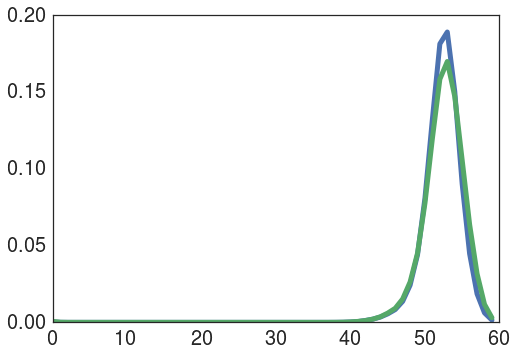

In [50]:
plt.plot(this.unbound_population)
plt.plot(this.bound_population)